In [17]:
'''
    BIRCH clustering is a hierarchial clustering algorithm
    designed for large-scale datasets
'''

'\n    BIRCH clustering is a hierarchial clustering algorithm\n    designed for large-scale datasets\n'

In [18]:
# imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.cluster import Birch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_blobs



In [35]:
# prepare data for clustering
df = pd.read_csv("data/pbd_outliers_removed.csv")
#cols = [
#    "video_pause_4",
#    "video_play_4",
#    "video_watch_4",
#    "video_completed_4"
#]

cols = [
 "video_pause_1",
 "video_completed_1",
 "video_pause_4",
 "video_play_1",
 "video_watch_2",
 "video_watch_3",
 "video_seek_3",
 "video_play_2",
 "video_seek_4",
 "video_watch_1",
 "video_completed_2",
 "video_pause_2",
 "video_play_4",
 "video_play_3",
 "video_pause_3",
 "video_seek_1",
 "video_watch_4",
 "video_seek_2",
 "video_caption_1",
 "video_completed_3",
 "video_caption_2",
 "video_completed_4"
]


trimmed_df = df[cols]
#scores = df["ALG1_EOC_SCALE_SCORE_22"]

trimmed_df


,video_pause_1,video_completed_1,video_pause_4,video_play_1,video_watch_2,video_watch_3,video_seek_3,video_play_2,video_seek_4,video_watch_1,...,video_play_4,video_play_3,video_pause_3,video_seek_1,video_watch_4,video_seek_2,video_caption_1,video_completed_3,video_caption_2,video_completed_4
0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,7.0,1.0,5.0,...,1.0,2.0,1.0,5.0,2.0,3.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,0.0,10.0,5.0,0.0,0.0,6.0,0.0,4.0,...,0.0,0.0,0.0,5.0,0.0,3.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,10.0,2.0,1.0,9.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17907,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
17908,0.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,...,2.0,3.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0
17909,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17910,0.0,0.0,0.0,0.0,0.0,10.0,4.0,0.0,0.0,0.0,...,0.0,5.0,4.0,0.0,NaN,0.0,0.0,2.0,0.0,0.0


In [36]:
# scales data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(trimmed_df), columns=trimmed_df.columns)

df_scaled


,video_pause_1,video_completed_1,video_pause_4,video_play_1,video_watch_2,video_watch_3,video_seek_3,video_play_2,video_seek_4,video_watch_1,...,video_play_4,video_play_3,video_pause_3,video_seek_1,video_watch_4,video_seek_2,video_caption_1,video_completed_3,video_caption_2,video_completed_4
0,-0.395875,0.037324,-0.235402,-0.242290,-0.106130,-0.452218,-0.200839,0.229661,-0.201098,-0.306070,...,-0.392386,-0.211992,-0.247496,0.261758,-0.402636,0.099940,-0.479943,-0.490929,-0.392215,-0.480737
1,-0.745800,-0.609889,-0.546886,-0.760437,-0.692484,-0.613318,-0.584431,-0.688209,-0.539707,-0.779847,...,-0.573796,-0.628478,-0.600217,-0.718436,-0.574809,-0.638861,-0.479943,-0.490929,-0.392215,-0.480737
2,0.129013,-0.609889,-0.546886,0.275857,-0.106130,-0.613318,-0.584431,0.098536,-0.539707,-0.400825,...,-0.573796,-0.628478,-0.600217,0.261758,-0.574809,0.099940,0.790955,-0.490929,-0.392215,-0.480737
3,-0.745800,-0.609889,-0.546886,-0.760437,0.480223,-0.291119,-0.200839,0.491909,-0.539707,-0.779847,...,-0.573796,-0.420235,-0.247496,-0.718436,-0.574809,0.592473,-0.479943,0.129635,-0.392215,-0.480737
4,-0.745800,-0.609889,-0.546886,-0.760437,-0.457943,-0.613318,-0.584431,-0.163712,-0.539707,-0.779847,...,-0.573796,-0.628478,-0.600217,-0.718436,-0.574809,-0.146327,-0.479943,-0.490929,-0.392215,-0.480737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17907,-0.745800,-0.609889,-0.546886,-0.760437,-0.692484,-0.130019,-0.200839,-0.688209,-0.539707,-0.779847,...,-0.573796,-0.420235,-0.247496,-0.718436,-0.230462,-0.638861,-0.479943,-0.490929,-0.392215,-0.480737
17908,-0.745800,-0.609889,0.076082,-0.760437,-0.692484,0.353280,-0.200839,-0.688209,-0.539707,-0.779847,...,-0.210975,-0.003748,0.105225,-0.718436,-0.402636,-0.638861,-0.479943,0.129635,-0.392215,-0.480737
17909,-0.745800,-0.609889,-0.235402,-0.760437,-0.457943,-0.613318,-0.584431,-0.557084,-0.201098,-0.779847,...,-0.392386,-0.628478,-0.600217,-0.718436,-0.488723,-0.638861,-0.479943,-0.490929,-0.392215,-0.480737
17910,-0.745800,-0.609889,-0.546886,-0.760437,-0.692484,0.997679,0.949935,-0.688209,-0.539707,-0.779847,...,-0.573796,0.412739,0.810666,-0.718436,NaN,-0.638861,-0.479943,0.750199,-0.392215,-0.480737


In [37]:
# remove NaN
# this imputer completes missing values with the mean
imputer = SimpleImputer(strategy="mean")
df_scaled = imputer.fit_transform(df_scaled)

In [38]:
# dimensionality scaling
'''
    Visualizes high-dimensional data by giving each data point a location
    in a two or three-dimensional map. 
'''
# synthetic data for testing
#df_scaled, _ = make_blobs(n_samples=1000, centers=100, random_state=0)

tsne = TSNE(n_components=2, random_state = 0)
df_tsne = pd.DataFrame(tsne.fit_transform(df_scaled), columns=["TSNE1", "TSNE2"])

In [39]:
# chose numbers of clusters
subcluster_sizes = [len(subcluster) for subcluster in brc.subcluster_centers_]
print("Number of subclusters at each level:", subcluster_sizes)


Number of subclusters at each level: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [47]:
brc = Birch(n_clusters=6)
brc.fit(df_tsne)
labels = brc.predict(df_tsne)

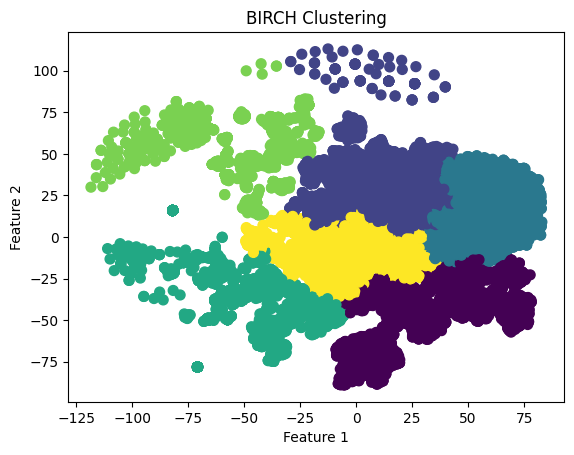

In [48]:
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=labels, cmap='viridis', marker='o', s=50)
plt.title('BIRCH Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()